[wiki](https://en.wikipedia.org/wiki/One-way_analysis_of_variance)
Erik_Marsja [youtube](https://www.youtube.com/watch?time_continue=146&v=Lp2aV_4LF48) [blog](https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/)

<div align="center"><img src="img/Screen Shot 2019-08-14 at 10.56.08 PM.png" width="100%" height="30%"></div>

https://en.wikipedia.org/wiki/One-way_analysis_of_variance

            df    sum_sq   mean_sq         F   PR(>F)
group      2.0   3.76634  1.883170  4.846088  0.01591
Residual  27.0  10.49209  0.388596       NaN      NaN


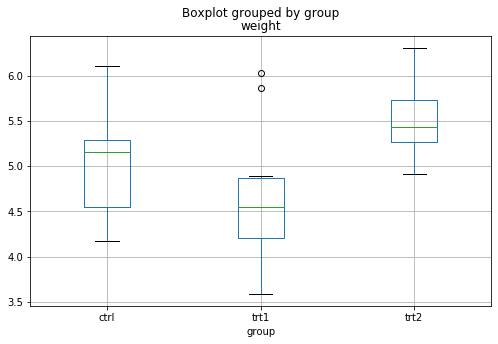

In [14]:
%matplotlib inline
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
df = pd.read_csv("data/PlantGrowth.csv", usecols=[1,2])
df.boxplot('weight', by='group', figsize=(8, 5))
model = ols('weight ~ group', df).fit()
print(anova_lm(model))

In [10]:
# notations are from https://en.wikipedia.org/wiki/One-way_analysis_of_variance

import pandas as pd
import numpy as np
import scipy.stats as stats

J = len(pd.unique(df.group))  # number of treatments
I_j = df.groupby('group').size()[0] # participants in each condition
I = J * I_j  # participants times conditions

DF_Treatment = J - 1 
DF_Error = I - J 
DF_Total = I - 1

SS_Treatment = sum(df.groupby('group').sum()['weight']**2/I_j) \
    - (df['weight'].sum()**2)/I
SS_Error = np.sum(df['weight'].values**2) \
    - sum(df.groupby('group').sum()['weight']**2/I_j)
SS_Total = SS_Treatment + SS_Error 

MS_Treatment = SS_Treatment / DF_Treatment
MS_Error = SS_Error / DF_Error

F = MS_Treatment / MS_Error

p_value = 1 - stats.f.cdf(F, DF_Treatment, DF_Error)

eta_sqrd = SS_Treatment / SS_Total

om_sqrd = (SS_Treatment - (DF_Treatment * MS_Error)) / (SS_Total + MS_Error)

print(p_value)

0.015909958325621407


$$\begin{array}{lll}
\mu_1=\mu_2 ?&\Rightarrow&\mbox{t-test}\\
\\
\mu_1=\mu_2=\cdots=\mu_k ?&\Rightarrow&\mbox{one way ANOVA}
\end{array}$$

In [10]:
%matplotlib inline
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

df = pd.read_csv("data/PlantGrowth.csv", usecols=[1,2])
df = df.groupby('group')
print(df)